**Ham or Spam Detector in Text RNN**

# To download the file https://www.kaggle.com/uciml/sms-spam-collection-dataset/data

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam.csv
User uploaded file "spam.csv" with length 503663 bytes


**Libraries**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [48]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df.iloc[:,:2]

In [49]:
df.columns = ['option','comments']

In [50]:
len(df)

5572

Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


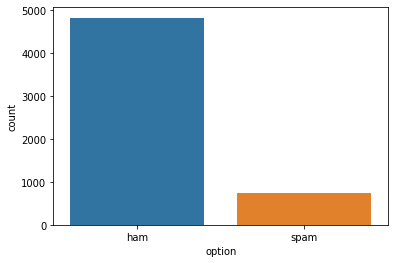

In [51]:
%matplotlib inline
sns.countplot(df.option)

In [52]:
X = df.comments
Y = df.option

lb = LabelEncoder()

Y_enc = lb.fit_transform(Y)

Y_res = Y_enc.reshape(-1, 1)

In [77]:
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: option, Length: 5572, dtype: object

In [76]:
Y_enc

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
Y_enc.shape

(5572,)

In [54]:
Y_res.shape

(5572, 1)

In [55]:
len(X)

5572

#If you have an array of shape (2,4) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).

**Preparing**

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X, Y_res, test_size=0.15)

# A good first step when working with text is to split it into words. Words are called tokens and the process of splitting text into tokens is called tokenization.
# Keras provides the text_to_word_sequence() function that you can use to split text into a list of words.

In [57]:
# The maximum number of words to keep, based on word frequency. 
max_words = 1000
max_len = 150
# Creating Instance of Tokenizer Class and giving max_number of words
tok = Tokenizer(num_words=max_words)
# Fitting On Our Dataset of Setences
tok.fit_on_texts(X_train)
# Used to Convert Text into List of Words
sequences = tok.texts_to_sequences(X_train)
# This line of code is to convert list of sequences into same length
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

```
>>> pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]])

array([[0, 1, 2, 3],
       [3, 4, 5, 6],
       [0, 0, 7, 8]], dtype=int32)
```

# Keras Embedding Layer. Keras offers an Embedding layer that can be used for neural networks on text data. It requires that the input data be integer
# encoded, so that each word is represented by a unique integer. ... It can be used to load a pre-trained word embedding model, a type of transfer learning

**Making RNN Model**


#The first argument is the number of distinct words in the training set. The second argument indicates the size of the embedding vectors. The input_length argumet, of course, determines the size of each input sequence.

In [58]:
def RNN():
    inputs = Input(shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    # units: Positive integer, dimensionality of the output space.
    layer = LSTM(units=64)(layer)
    # No of Hidden Layers with Relu activation function
    layer = Dense(units=256)(layer)
    layer = Activation('relu')(layer)
    # Droping Out Neurons for increasing of accuracy
    layer = Dropout(0.5)(layer)
    # Output Layer with Sigmoid Activation Function
    layer = Dense(units=1)(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [59]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

# A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states
# and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential 
#  or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.

**Training And Predicting**

In [61]:
model.fit(sequences_matrix,
          y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2,
          # monitor: Quantity to be monitored.
          # min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 6s 191ms/step - loss: 0.3277 - accuracy: 0.8749 - val_loss: 0.1182 - val_accuracy: 0.9863
Epoch 2/10
30/30 [==============================] - 5s 170ms/step - loss: 0.0860 - accuracy: 0.9802 - val_loss: 0.0465 - val_accuracy: 0.9884
Epoch 3/10
30/30 [==============================] - 5s 169ms/step - loss: 0.0451 - accuracy: 0.9868 - val_loss: 0.0614 - val_accuracy: 0.9873


#Your understanding is correct. To add more details - validation_split keras function makes easy for the user to split the training dataset into train and validation (saving your custom efforts).For example - setting validation_split=0.2, tells keras to use last 20% of the data before shuffling for validation.


**Prediction**

In [63]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

accr = model.evaluate(test_sequences_matrix,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

27/27 [==============================] - 0s 18ms/step - loss: 0.0777 - accuracy: 0.9797
Test set
  Loss: 0.078
  Accuracy: 0.980


In [80]:
Testing_context = ["Oh k...i'm watching here:)"]

txts = tok.texts_to_sequences(Testing_context)
txts = sequence.pad_sequences(txts, maxlen=max_len)

preds = model.predict(txts)
print(preds)

[[0.00504524]]


In [65]:
prds = model.predict(test_sequences_matrix)

In [74]:
lst = []
for i in prds:
  for j in i:
    lst.append(int(round(j)))

In [75]:
from collections import Counter
Counter(lst)

Counter({0: 713, 1: 123})

**0 for Ham and 1 for Spam**